In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("credit card.csv")
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [4]:
data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [5]:
data.shape

(660, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
# to check duplicate values
data.duplicated().sum()

0

In [8]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [9]:
# Identify the duplicated customer keys
duplicate_keys = data.duplicated('Customer Key') == True
duplicate_keys

0      False
1      False
2      False
3      False
4      False
       ...  
655    False
656    False
657    False
658    False
659    False
Length: 660, dtype: bool

In [10]:
# Drop duplicated keys
data = data[duplicate_keys == False]

In [11]:
# drop the columns that is not needed for the Analysis
data.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

In [12]:
data.shape

(655, 5)

In [13]:
# Exploratory Data Analysis

In [14]:
data.shape

(655, 5)

In [15]:
data.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [16]:
data.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,655.000000,655.000000,655.000000,655.000000,655.000000
mean,34242.748092,4.691603,2.401527,2.606107,3.601527
std,37240.896986,2.169325,1.633648,2.940380,2.867352
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


<Axes: xlabel='Avg_Credit_Limit', ylabel='Density'>

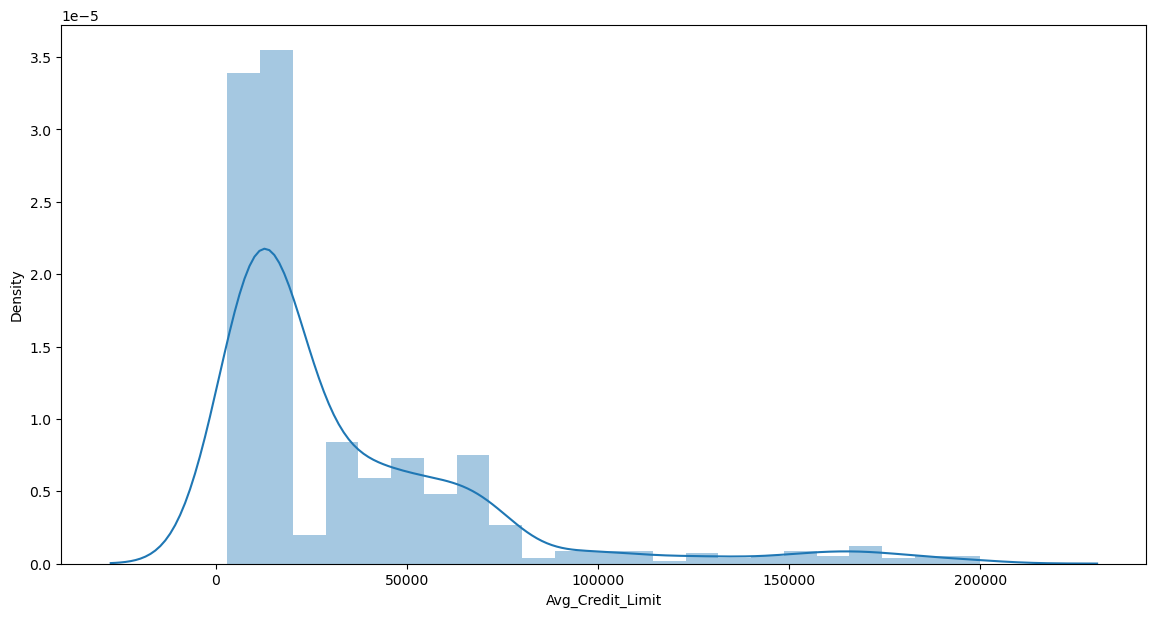

In [17]:
plt.figure(figsize = (14, 7))
sns.distplot(data['Avg_Credit_Limit'])

<Axes: >

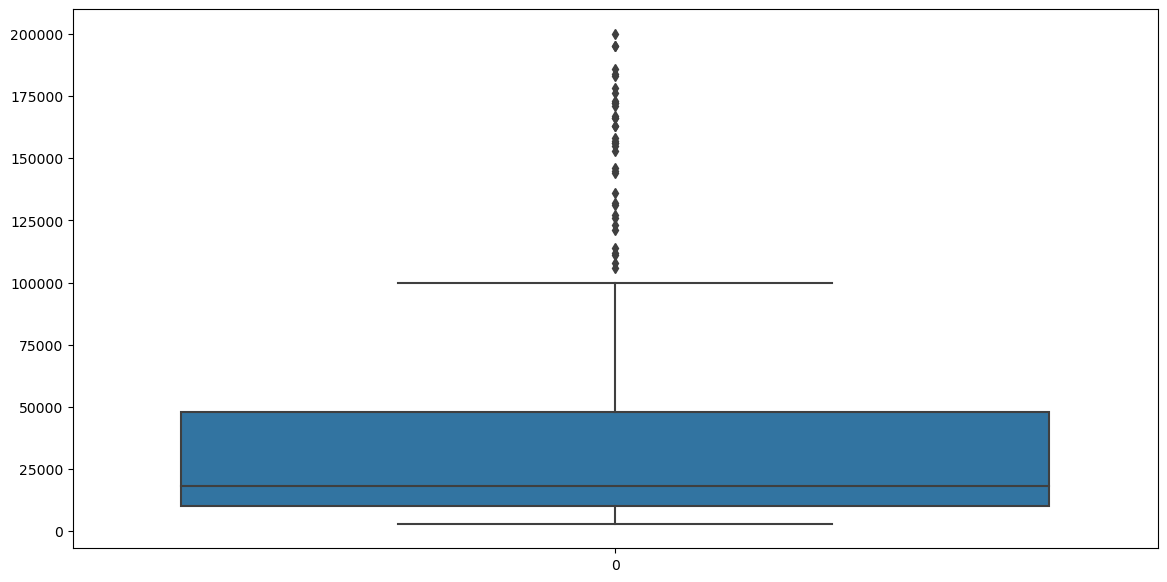

In [18]:
plt.figure(figsize = (14, 7))
sns.boxplot(data['Avg_Credit_Limit'])

In [19]:
data.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

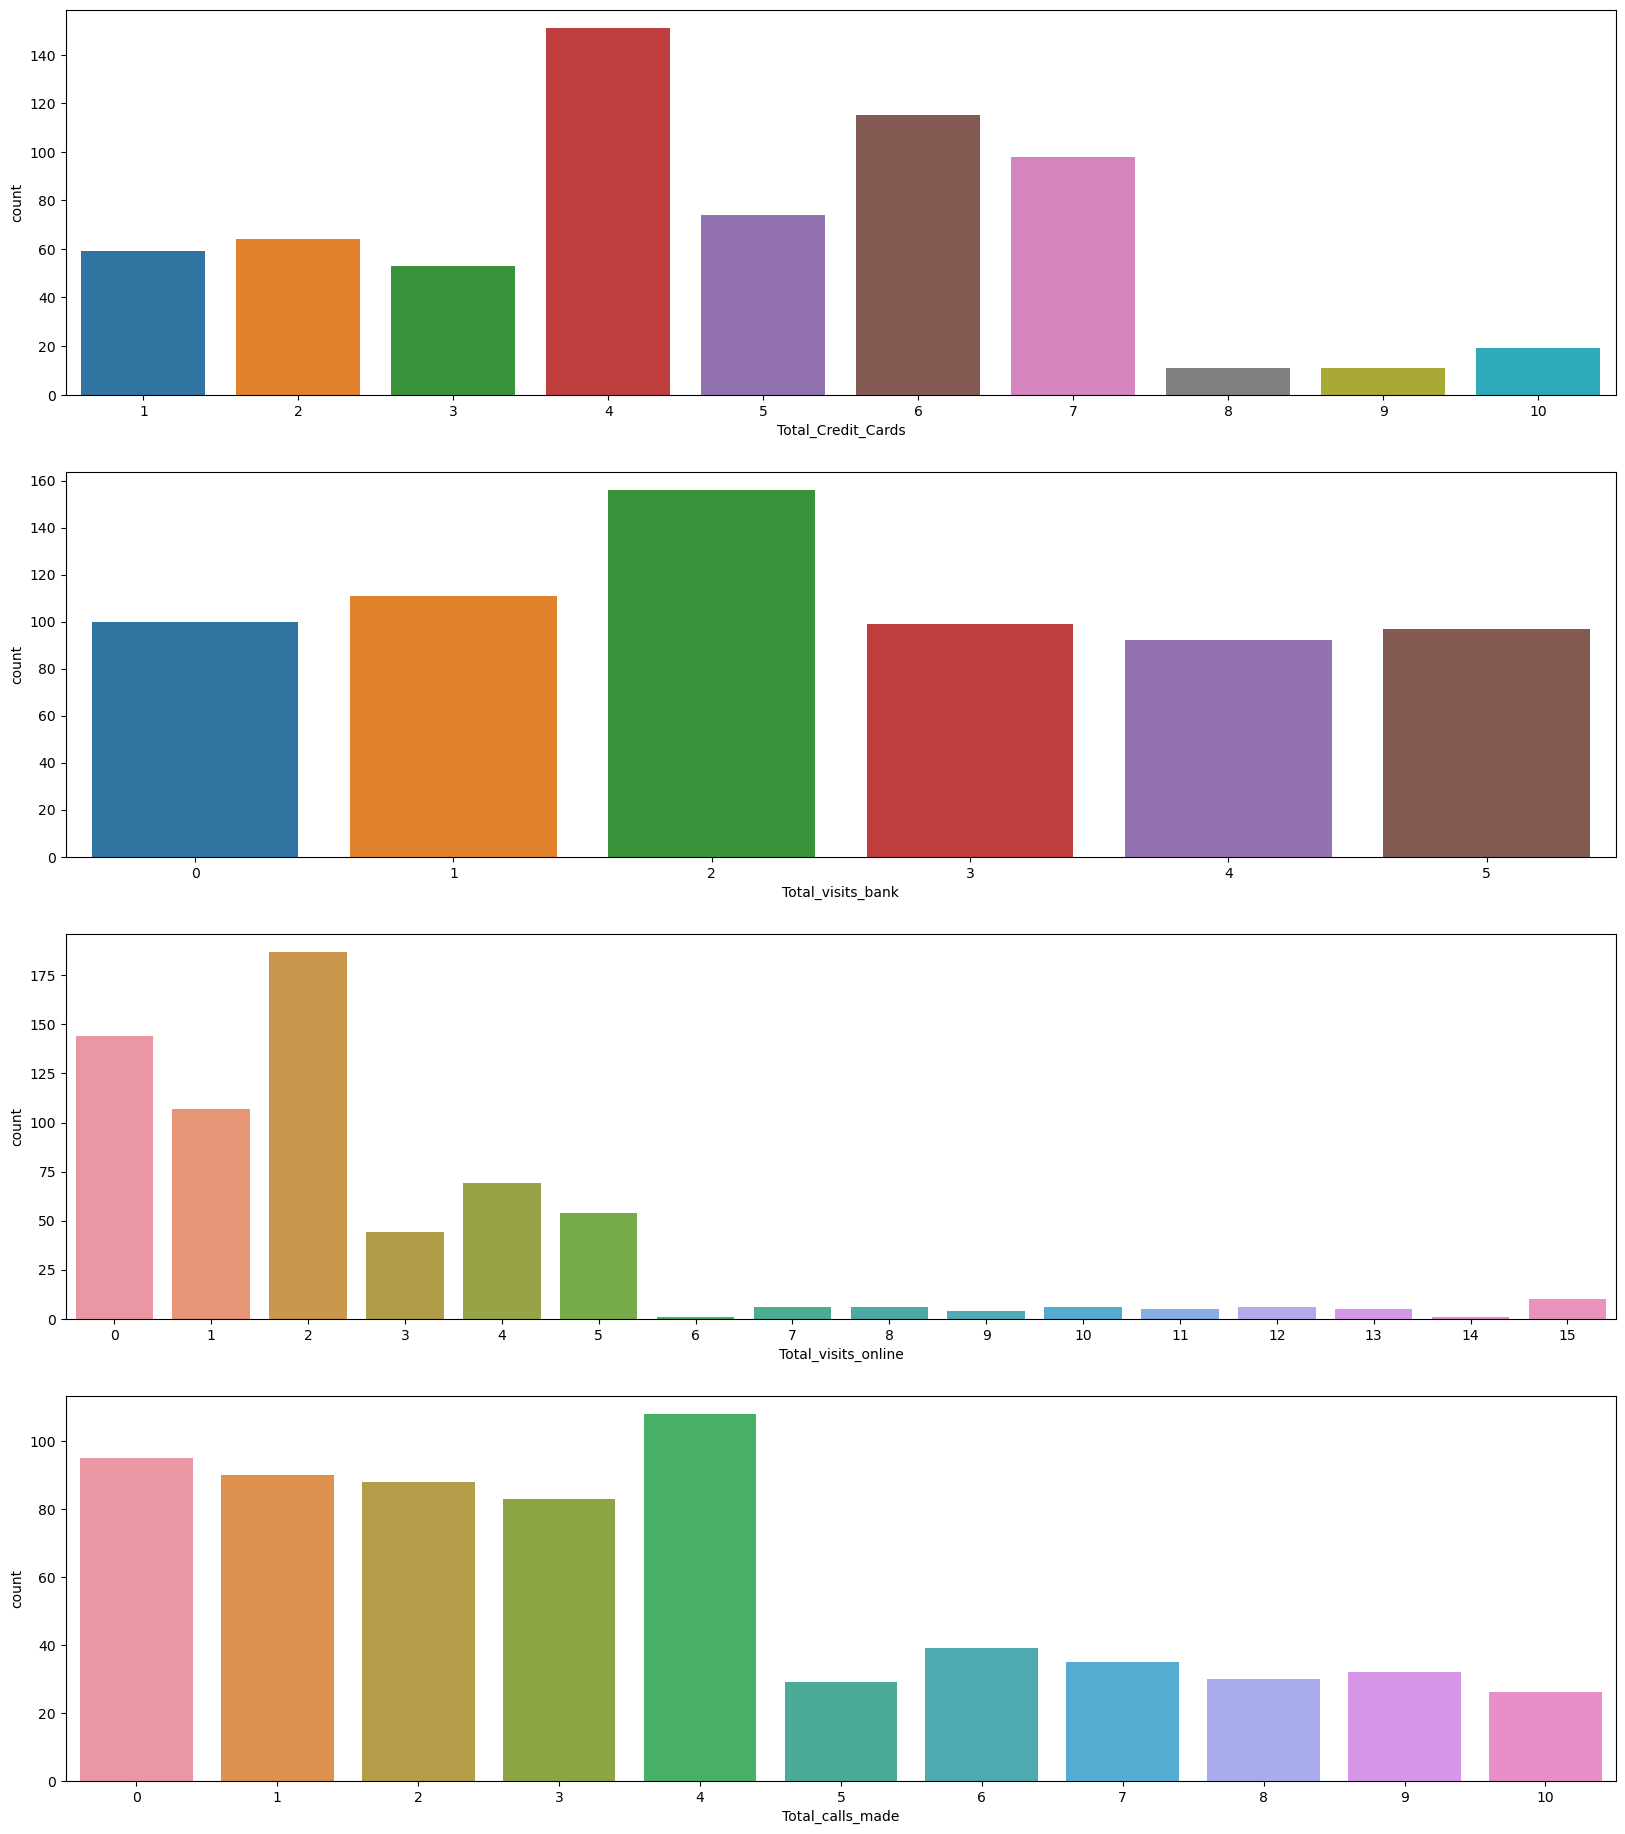

In [20]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 23))

cols_ = ['Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

for ind, col in enumerate(cols_):
    sns.countplot(x=col, data=data, ax=ax[ind])

In [21]:
Observations
The above graph shows that the maximum customers have 4 credit cards.
Majority of customers visited bank for 2 times.
Majority of customers visited bank online for 2 times followed by 0 times.
Maximum customers have made 4 calls followed by no calls and 1 call.

SyntaxError: invalid syntax (1851588682.py, line 2)

Multi variate Analysis

In [ ]:
plt.figure(figsize=(15,8))

sns.heatmap(data[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].corr(), 
            annot=True, cmap="PiYG");

Data pre processing

outlier Detection & handling

In [ ]:
# Outlier Detection For Average Credit Limit

Q1 = data['Avg_Credit_Limit'].quantile(0.25)
Q3 = data['Avg_Credit_Limit'].quantile(0.75)

IQR = Q3 - Q1
data = data[(data['Avg_Credit_Limit'] >= Q1 - 3*IQR) & (data['Avg_Credit_Limit'] <= Q3 + 3*IQR)]

In [ ]:
## Let's visualize the graph after outlier treatment

plt.figure(figsize=(15, 10))

sns.boxplot(data['Avg_Credit_Limit'], orient = 'v')
plt.show()

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
# Standardize the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_data = scaler.fit_transform(data)

In [ ]:
std_data

In [ ]:
std_data_x = np.copy(std_data)

In [ ]:
## K- Means clustering Algo
from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn import cluster 
from sklearn.cluster import SpectralClustering

In [ ]:
# determining the number of clusters with elbow methods
wcss = []
cluster_list = range(1, 12)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, random_state = 40)
    kmeans.fit(std_data)
    wcss.append(kmeans.inertia_)

In [ ]:
plt.figure(figsize=(13, 9))
plt.plot(cluster_list, wcss)
plt.title('The Elbow Graph')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

we can see that elboow bend at cluster no 3 , now we can say that the particular dataset we can choose 3 cluster 

In [ ]:
## we can also check number of cluster by silhouette score method
kmeans_values=[]

for cluster in range(2,12):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(std_data)
    sil_score = metrics.silhouette_score(std_data, kmeans, metric='euclidean')
    print("For n_clusters = {}, the silhouette score is {})".format(cluster, sil_score))
    kmeans_values.append((cluster,sil_score))

we can clearly see  that the silhouette score is greater when we have 3  clusters

In [ ]:
#Now we can create a model with k=3  based on elbow curve and silhouette score
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 42)

In [ ]:
y = kmeans.fit_predict(std_data)
y

In [ ]:
kmeans.cluster_centers_

In [ ]:
#Cluster Profiling with K-Means Clustering Method
data['K_means_segments'] = kmeans.labels_

In [ ]:
data['K_means_segments'].value_counts()

In [ ]:
data.head()

In [ ]:
data['K_means_segments'] = kmeans.labels_
cluster_profile = data.groupby('K_means_segments').mean()
cluster_profile['No. of Customers'] = data.groupby('K_means_segments')['Avg_Credit_Limit'].count().values
cluster_profile

In [ ]:
Insights
If we look at the data we see that there is a group which prefers online interactions with their bank, they have a much higher credit limit and also have more credit cards (cluster - 2), but this group has minimum no. of customers (32).
The customers who prefer in-person interactions tend to have the mid-range of credit cards and credit limit (cluster - 1) and this group has highest number of customers (382).
The customers who contact via phonecall are in another segment, who have lowest credit limit and number of cards (cluster - 0).